In [1]:
# Install necessary libraries
! pip install textblob emoji scikit-learn

# Download necessary corpora for TextBlob
! python -m textblob.download_corpora

# Download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: C:\Users\wrksy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\wrksy\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wrksy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wrksy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wrksy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\wrksy\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\wrksy\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [13]:

# Load the data
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from textblob import TextBlob
import emoji
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
# Read data
data = pd.read_csv('C:/Users/wrksy/OneDrive/Documenti/tweet-stance-prediction-master/semeval.csv')
data.head()

# Initialize lemmatizer and stopwords list
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)


In [19]:
data.head()

,ID,Target,Tweet,Stance,Clean_Tweet,Stance_Num
0,101,Atheism,dear lord thank u for all of ur blessings forg...,AGAINST,dear lord thank u blessing forgive sin lord gi...,0
1,102,Atheism,"Blessed are the peacemakers, for they shall be...",AGAINST,blessed peacemaker shall called child god matt...,0
2,103,Atheism,I am not conformed to this world. I am transfo...,AGAINST,confirmed world transformed rendering mind,0
3,104,Atheism,Salah should be prayed with #focus and #unders...,AGAINST,sarah prayed warns prayer done sarah amazon 10746,0
4,105,Atheism,And stay in your houses and do not display you...,AGAINST,stay house display like time ignorance ran 3333,0


In [15]:
# Preprocessing function
def preprocess(tweet):
    # Remove URLs, mentions, hashtags, punctuation, emojis, and convert to lowercase
    tweet = re.sub(r'http\S+|@\w+|#\w+|[^\w\s]', '', tweet.lower())
    tweet = remove_emoji(tweet)
    # Correct spelling using TextBlob
    tweet = str(TextBlob(tweet).correct())
    words = tweet.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to each tweet
data['Clean_Tweet'] = data['Tweet'].apply(preprocess)

# Convert stance to numerical
stance_map = {'AGAINST': 0, 'FAVOR': 1, 'NONE': 2}
data['Stance_Num'] = data['Stance'].map(stance_map)


In [17]:
# Test the model with new tweets
test_tweets = [
    "God is great and always watching over us. #blessed",
    "Religion is just a way to control people. Think for yourself!",
    "I respect everyone's beliefs, whether they're religious or not.",
    "Science has disproven the existence of any deity.",
    "Faith gives me strength to face life's challenges.",
    "If you take care of yourself you'll have a happy life"
]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Classifier: Logistic Regression
Best Parameters: {'clf__C': 10, 'tfidf__max_features': 20000, 'tfidf__ngram_range': (1, 3)}
Accuracy: 0.5630550621669627
Confusion Matrix:
[[200  38  30]
 [ 54  57  24]
 [ 79  21  60]]
Classification Report:
              precision    recall  f1-score     support
AGAINST        0.600601  0.746269  0.665557  268.000000
FAVOR          0.491379  0.422222  0.454183  135.000000
NONE           0.526316  0.375000  0.437956  160.000000
accuracy       0.563055  0.563055  0.563055    0.563055
macro avg      0.539432  0.514497  0.519232  563.000000
weighted avg   0.553300  0.563055  0.550190  563.000000


Classifier: SVM
Best Parameters: {'clf__C': 10, 'clf__kern

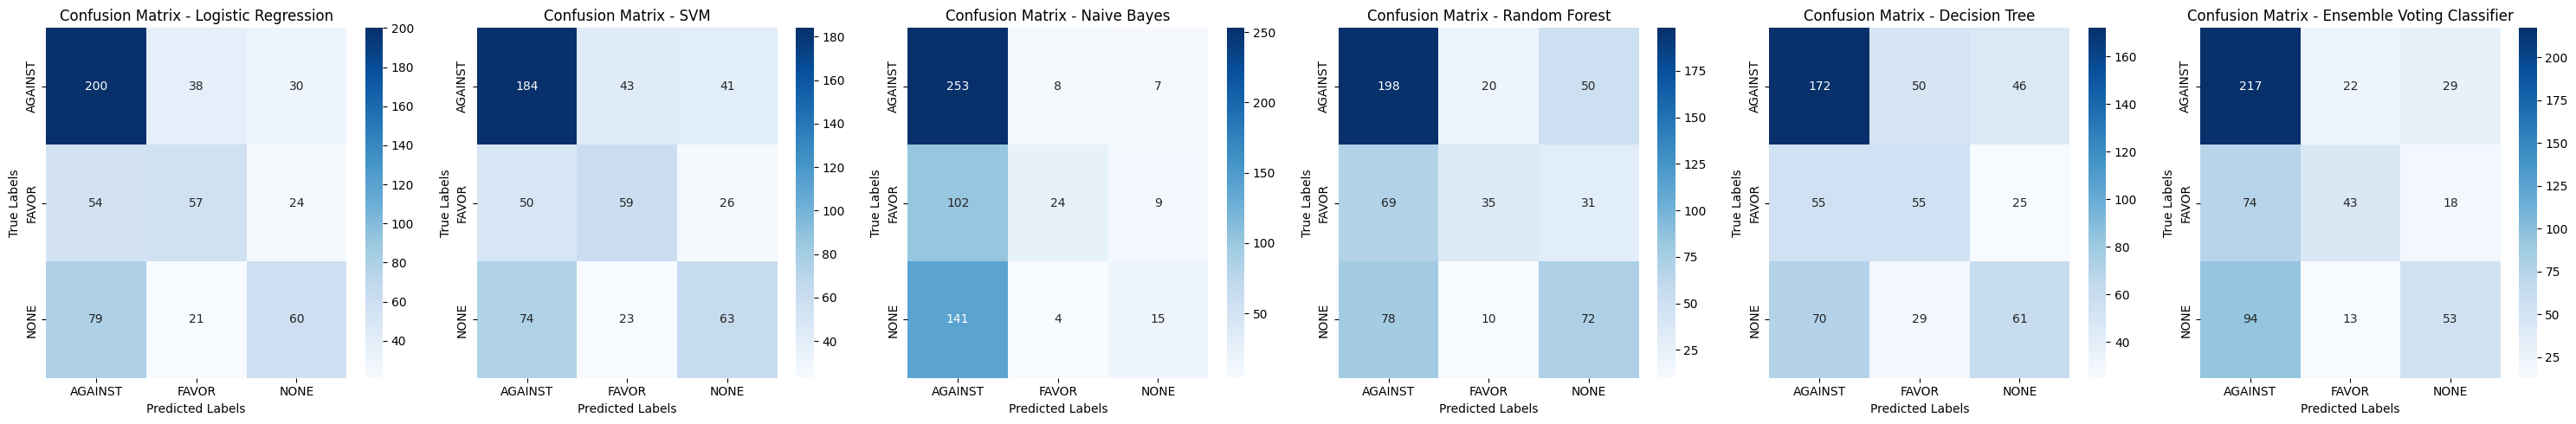

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(data['Clean_Tweet'], data['Stance_Num'], test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000),
    'SVM': SVC(random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Define a parameter grid for GridSearchCV
param_grid = {
    'Logistic Regression': {
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'tfidf__max_features': [5000, 10000, 20000],
        'clf__C': [0.1, 1, 10]
    },
    'SVM': {
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'tfidf__max_features': [5000, 10000, 20000],
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf']
    },
    'Naive Bayes': {
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'tfidf__max_features': [5000, 10000, 20000]
    },
    'Random Forest': {
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'tfidf__max_features': [5000, 10000, 20000],
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [10, 20, None]
    },
    'Decision Tree': {
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'tfidf__max_features': [5000, 10000, 20000],
        'clf__max_depth': [10, 20, None]
    }
}

# Store results
results = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),  # No specific settings here, it will be set by GridSearchCV
        ('clf', clf)
    ])
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, n_jobs=-1, verbose=2, error_score='raise')
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Make predictions
    y_pred = grid_search.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred, target_names=['AGAINST', 'FAVOR', 'NONE'], output_dict=True)
    
    # Store results
    results.append({
        'Classifier': name,
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': clf_report
    })

# Ensemble Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(random_state=42, max_iter=2000, C=results[0]['Best Params']['clf__C'])),
    ('svm', SVC(random_state=42, kernel=results[1]['Best Params']['clf__kernel'], C=results[1]['Best Params']['clf__C'])),
    ('nb', MultinomialNB()),
    ('rf', RandomForestClassifier(random_state=42, n_estimators=results[3]['Best Params']['clf__n_estimators'], max_depth=results[3]['Best Params']['clf__max_depth'])),
    ('dt', DecisionTreeClassifier(random_state=42, max_depth=results[4]['Best Params']['clf__max_depth']))
], voting='hard')

pipeline_voting = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=10000)),  # Using best parameters
    ('clf', voting_clf)
])

# Fit the ensemble model
pipeline_voting.fit(X_train, y_train)

# Make predictions with the ensemble model
y_pred_voting = pipeline_voting.predict(X_test)

# Evaluate ensemble model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
clf_report_voting = classification_report(y_test, y_pred_voting, target_names=['AGAINST', 'FAVOR', 'NONE'], output_dict=True)

# Store ensemble result
results.append({
    'Classifier': 'Ensemble Voting Classifier',
    'Accuracy': accuracy_voting,
    'Confusion Matrix': conf_matrix_voting,
    'Classification Report': clf_report_voting
})

# Display results
for result in results:
    print(f"Classifier: {result['Classifier']}")
    if 'Best Params' in result:
        print(f"Best Parameters: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy']}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Classification Report:")
    print(pd.DataFrame(result['Classification Report']).transpose())
    print("\n")

# Plot confusion matrices
fig, axes = plt.subplots(1, 6, figsize=(30, 5))
for ax, result in zip(axes, results):
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=ax, xticklabels=['AGAINST', 'FAVOR', 'NONE'], yticklabels=['AGAINST', 'FAVOR', 'NONE'])
    ax.set_title(f"Confusion Matrix - {result['Classifier']}")
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
plt.tight_layout()
plt.show()